# Topics Covered 
1. Scatter Plot based on Language to Moods, to understand how movie languages are distributed to each mood.
2. Line Graph to plot lines for 'Language to User Age' 
3. Heat map using 'Search Keyword' feature
4. Word Cloud of 'Tags', to highlight the important Tags that occurred across the dataset. 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

Text(0, 0.5, 'Mood')

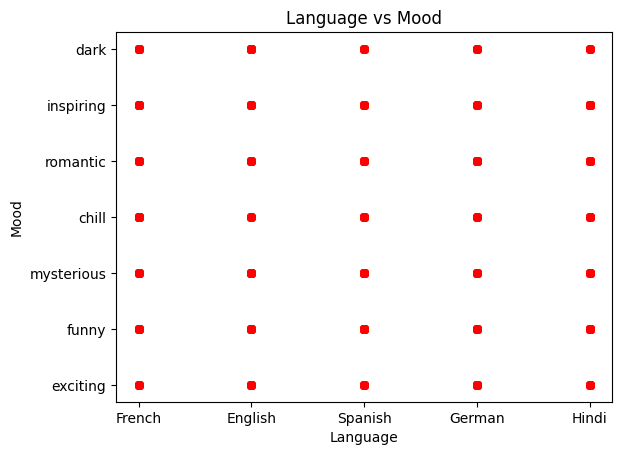

In [3]:
data = pd.read_csv("movie_data.csv")
data.head(2) 
plt.scatter(data['language'],data['mood'],s=30,alpha=0.8,color="red")
plt.title("Language vs Mood")
plt.xlabel("Language")
plt.ylabel("Mood")

In [4]:
# (data['language'],data['age_group']).plot(kind='line')
# plt.plot((data['language'],data['age_group']),kind='line')
# x = data['language']
# y = data['age_group']
# plt.plot(x, y ,'ro--')

In [5]:
data.head(4)

,user_id,movie_id,movie_name,genre,timestamp,watched_duration_pct,liked,disliked,watch_later,shared,...,language,user_rating,age_group,safety_flag,data_source,mood,search_query,search_keywords,session_id,tags
0,c5fa3f7a-b0a4-4684-99d7-8a3b00241795,def85dab-ef16-428c-9625-91e1d5c05d2f,Agent every,Sci-Fi,2024-11-03 00:23:11,20.02,False,False,False,False,...,French,NaN,18-25,True,synthetic_v1,exciting,Quality throughout beautiful,"['quality', 'throughout', 'beautiful']",a0a904d3-234d-4510-8f18-03128cdbbdc0,"['Horror', 'mysterious']"
1,0af83eb4-1884-448c-832e-32d9dc2ae023,21d00494-71db-4f81-8bed-918893dab8a3,All behavior discussion,Romance,2025-03-30 03:07:58,64.18,False,False,False,False,...,English,NaN,26-35,True,synthetic_v1,funny,Current practice nation determine operation speak,"['current', 'practice', 'nation', 'determine',...",e8371aa2-56a9-4b97-abd7-da1036715d9a,"['Sci-Fi', 'Romance', 'Drama']"
2,718d4cb8-8b1f-451a-8aef-e412e91a7333,57064a20-2abf-428a-becf-5dfcdb77e2e7,Song,Comedy,2025-06-17 06:41:29,96.15,True,False,True,True,...,English,3.9,60+,True,synthetic_v1,exciting,Future choice whatever from behavior,"['future', 'choice', 'whatever', 'from', 'beha...",1247074d-90ef-40a5-ae99-d551f7138bc9,"['Comedy', 'romantic', 'Romance']"
3,26e1a02b-eec7-48b9-93fc-c0bf4940b066,d7eb6835-7796-4036-9caa-eb9eb78ac441,Grow gas,Thriller,2024-11-19 01:25:29,66.58,False,False,False,False,...,Spanish,NaN,18-25,True,synthetic_v1,mysterious,Role movie win,"['role', 'movie', 'win']",51b28aee-7e7e-4ccf-bce1-1471487797ee,"['mysterious', 'Comedy']"


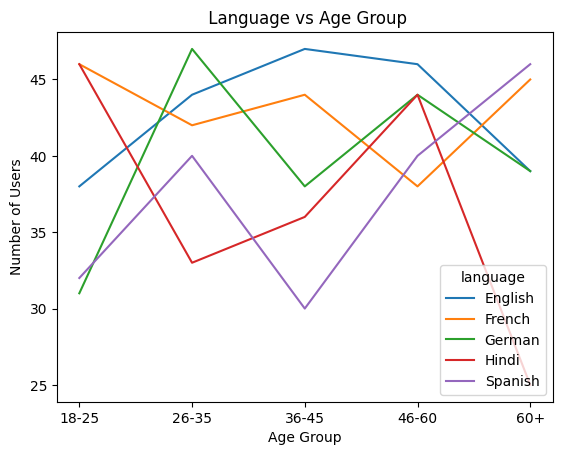

In [6]:
graph = data.groupby(["language", "age_group"]).size().reset_index(name="count")
sns.lineplot(x="age_group", y="count",  hue="language" ,data=graph)
plt.title(" Language vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()


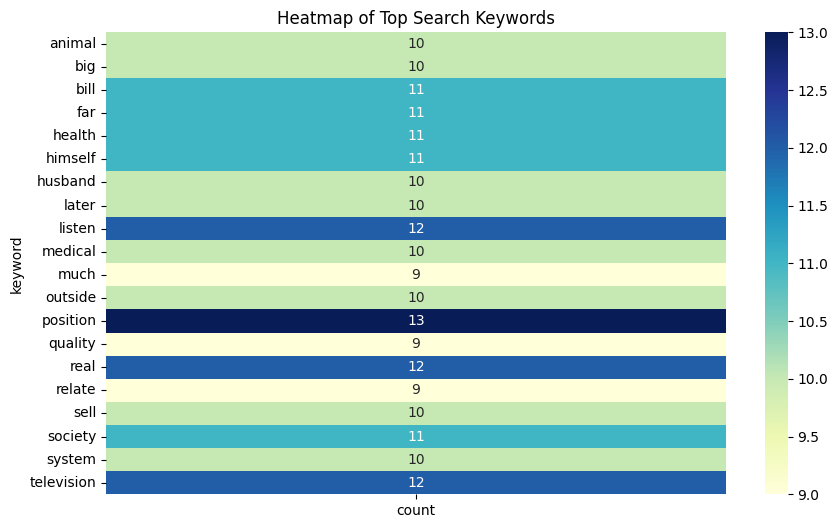

In [7]:
from collections import Counter
import ast
keywords = []
for val in data["search_keywords"].dropna():
    try:
        words = ast.literal_eval(val)  
        keywords.extend(words)
    except:
        pass

keyword_counts = Counter(keywords)
keyword_df = pd.DataFrame(keyword_counts.most_common(20), columns=["keyword", "count"])

plt.figure(figsize=(10,6))
sns.heatmap(keyword_df.pivot_table(values="count", index="keyword", aggfunc="sum"),
            annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Top Search Keywords")
plt.show()

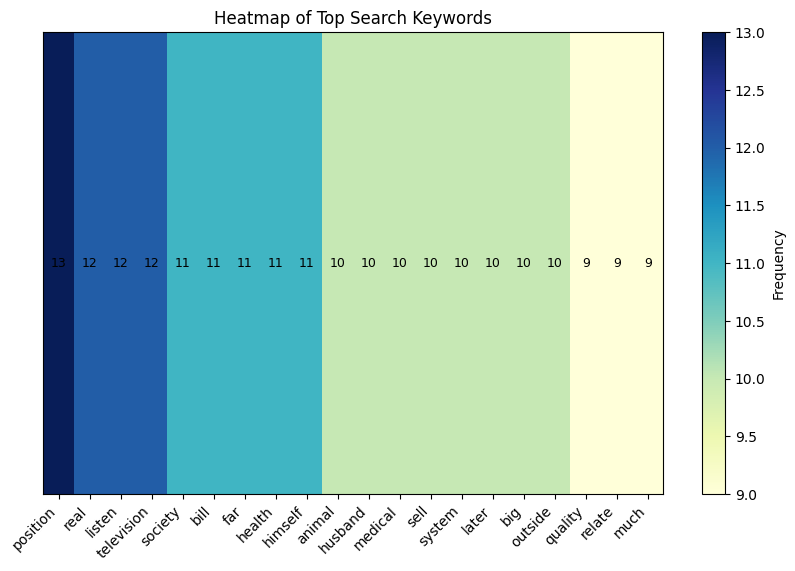

In [8]:
keywords = []
for val in data["search_keywords"].dropna():
    try:
        words = ast.literal_eval(val)          
        keywords.extend(words)
    except:
        pass

keyword_counts = Counter(keywords).most_common(20)
keyword_labels = [k for k, _ in keyword_counts]
keyword_values = [v for _, v in keyword_counts]

plt.figure(figsize=(10,6))
plt.imshow([keyword_values], cmap="YlGnBu", aspect="auto")
plt.colorbar(label="Frequency")

for i, val in enumerate(keyword_values):
    plt.text(i, 0, str(val), ha="center", va="center", color="black", fontsize=9)

plt.xticks(range(len(keyword_labels)), keyword_labels, rotation=45, ha="right")
plt.yticks([])
plt.title("Heatmap of Top Search Keywords")
plt.show()

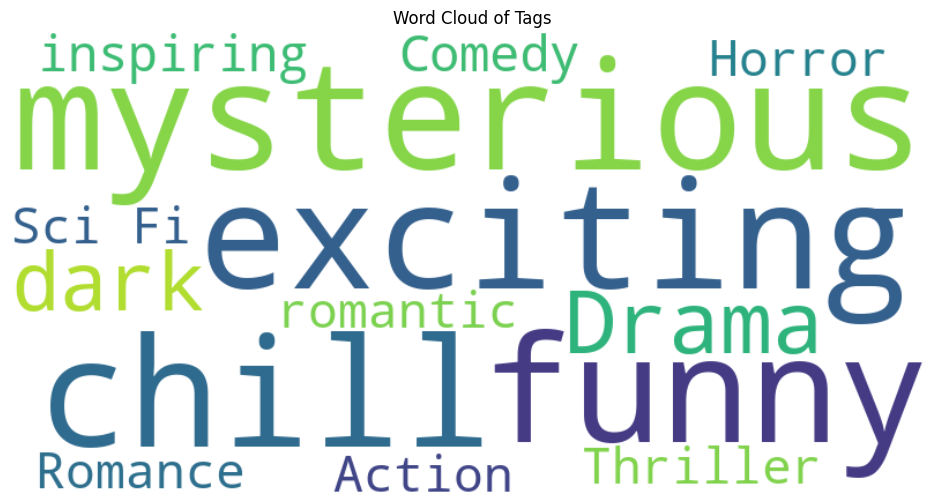

In [9]:
from wordcloud import WordCloud
tags = []
for val in data["tags"].dropna():
    try:
        t = ast.literal_eval(val)
        tags.extend(t)
    except:
        pass  

tag_text = " ".join(tags)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(tag_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tags")
plt.show()   

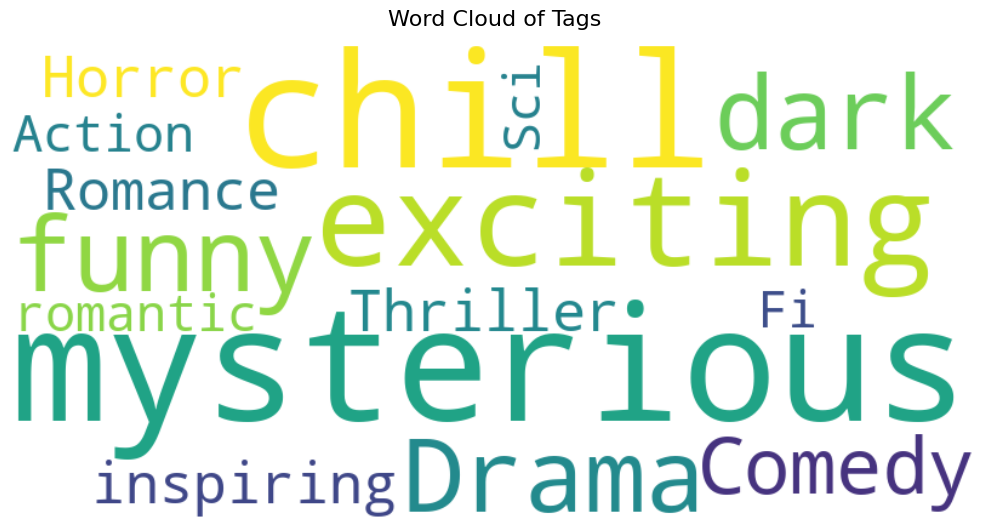

In [11]:
from wordcloud import WordCloud

data = pd.read_csv("movie_data.csv")

data["tags"] = data["tags"].apply(lambda x: ast.literal_eval(x))

all_tags = " ".join([tag for tags in data["tags"] for tag in tags])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",   
    collocations=False
).generate(all_tags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tags", fontsize=16)
plt.tight_layout()

plt.savefig("wordcloud_tags.png")
plt.show()